In [1]:
#1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

#Ans

# Install TensorFlow and Keras
!pip install tensorflow
!pip install keras

# Load the installed packages and print their versions
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [2]:
#2. Load the Wine Quality dataset and explore its dimensions.

#Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

#Ans

import pandas as pd

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Display the dimensions of the dataset
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1599
Number of columns: 12


In [3]:
#3. Check for null values, identify categorical variables, and encode them.

#Ans

import pandas as pd

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print("Encoded dataset:")
print(encoded_data.head())

Null values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical columns: Index(['quality'], dtype='object')
Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0        

In [6]:
#4. Separate the features and target variables from the dataframe.

#Ans

import pandas as pd

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Display the first few rows of the features and target variables
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      

In [7]:
#5. Perform a train-test split and divide the data into training, validation, and test datasets.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1119, 11)
X_val shape: (240, 11)
X_test shape: (240, 11)
y_train shape: (1119,)
y_val shape: (240,)
y_test shape: (240,)


In [8]:
#6. Perform scaling on the dataset.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of scaled features
print("Scaled features (X_train_scaled):")
print(X_train_scaled[:5])

Scaled features (X_train_scaled):
[[ 1.69536131e-01 -1.72107140e+00  4.59303345e-01 -4.54281813e-01
  -5.03192118e-01  3.61097191e+00  9.09502082e-01 -4.01203069e-01
   1.01180685e+00  1.22661179e+00  5.50057013e-01]
 [ 2.44606730e+00 -4.01957443e-01  1.84105501e+00 -3.84209259e-01
  -3.54641111e-01 -9.66099468e-01 -9.68038212e-01  1.09923481e+00
  -2.10687612e+00  1.22661179e+00 -2.05174641e-01]
 [-6.47680186e-01  3.77472102e-02 -1.28054303e-03  3.62260706e-02
  -7.87606704e-02 -3.81792484e-01  9.39784989e-01 -2.05493781e-01
   4.92026353e-01  2.97270776e-01  5.50057013e-01]
 [-1.11466094e+00  7.52267272e-01 -9.73624306e-01 -3.14136704e-01
  -9.06401994e-01  2.99898997e-01  3.12977507e-02 -1.02094915e+00
   1.14175197e+00 -9.80573115e-01  9.27672840e-01]
 [-4.72562403e-01  2.57599537e-01 -6.66568381e-01 -2.44064149e-01
  -2.27311677e-01  1.07897498e+00  3.94692646e-01 -2.59857472e-01
  -2.22671827e-01 -3.99734983e-01 -5.82790468e-01]]


In [10]:
#7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/10
35/35 [==============================] - 2s 18ms/step - loss: 0.6171 - accuracy: 0.6649 - val_loss: 0.5828 - val_accuracy: 0.6833
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5163 - accuracy: 0.7507 - val_loss: 0.5798 - val_accuracy: 0.6792
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.4987 - accuracy: 0.7578 - val_loss: 0.5680 - val_accuracy: 0.6708
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7632 - val_loss: 0.5829 - val_accuracy: 0.6750
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.7685 - val_loss: 0.5530 - val_accuracy: 0.6917
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.7846 - val_loss: 0.5630 - val_accuracy: 0.6875
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.7757 - val_loss: 0.5533 - val_accuracy: 0.7083
Epoch 8/10
35/35 [=

In [11]:
#8. Create a Sequential model and add all the layers to it.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

# Add hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add output layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/10
35/35 [==============================] - 2s 15ms/step - loss: 0.6004 - accuracy: 0.6810 - val_loss: 0.5768 - val_accuracy: 0.6833
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7516 - val_loss: 0.5662 - val_accuracy: 0.6917
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7632 - val_loss: 0.5698 - val_accuracy: 0.6833
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7703 - val_loss: 0.5682 - val_accuracy: 0.6875
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7694 - val_loss: 0.5716 - val_accuracy: 0.6833
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.7694 - val_loss: 0.5544 - val_accuracy: 0.7167
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.7721 - val_loss: 0.5777 - val_accuracy: 0.6708
Epoch 8/10
35/35 [=

In [12]:
#9. Implement a TensorBoard callback to visualize and monitor the model's training process.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10, batch_size=32,
    callbacks=[tensorboard_callback]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/10
35/35 [==============================] - 2s 23ms/step - loss: 0.5814 - accuracy: 0.7194 - val_loss: 0.5764 - val_accuracy: 0.6917
Epoch 2/10
35/35 [==============================] - 0s 9ms/step - loss: 0.5113 - accuracy: 0.7551 - val_loss: 0.5837 - val_accuracy: 0.6750
Epoch 3/10
35/35 [==============================] - 0s 9ms/step - loss: 0.4984 - accuracy: 0.7596 - val_loss: 0.5659 - val_accuracy: 0.6875
Epoch 4/10
35/35 [==============================] - 0s 8ms/step - loss: 0.4854 - accuracy: 0.7685 - val_loss: 0.5669 - val_accuracy: 0.6833
Epoch 5/10
35/35 [==============================] - 0s 9ms/step - loss: 0.4771 - accuracy: 0.7739 - val_loss: 0.5553 - val_accuracy: 0.6792
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 0.4691 - accuracy: 0.7775 - val_loss: 0.5495 - val_accuracy: 0.6958
Epoch 7/10
35/35 [==============================] - 0s 8ms/step - loss: 0.4614 - accuracy: 0.7918 - val_loss: 0.5465 - val_accuracy: 0.7042
Epoch 8/10
35/35 [=

In [13]:
#10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

#Ans

#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define TensorBoard and EarlyStopping callbacks
log_dir = "./logs"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with TensorBoard and EarlyStopping callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100, batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/100
35/35 [==============================] - 2s 18ms/step - loss: 0.5908 - accuracy: 0.7105 - val_loss: 0.5849 - val_accuracy: 0.7083
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.5152 - accuracy: 0.7444 - val_loss: 0.5788 - val_accuracy: 0.6875
Epoch 3/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4970 - accuracy: 0.7632 - val_loss: 0.5748 - val_accuracy: 0.7000
Epoch 4/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4875 - accuracy: 0.7685 - val_loss: 0.5586 - val_accuracy: 0.7250
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4790 - accuracy: 0.7766 - val_loss: 0.5715 - val_accuracy: 0.7000
Epoch 6/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4720 - accuracy: 0.7811 - val_loss: 0.5695 - val_accuracy: 0.6917
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4662 - accuracy: 0.7775 - val_loss: 0.5625 - val_accuracy: 0.7125
Epoch 8/100


In [14]:
#11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define TensorBoard, EarlyStopping, and ModelCheckpoint callbacks
log_dir = "./logs"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100, batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/100
29/35 [=======================>......] - ETA: 0s - loss: 0.6029 - accuracy: 0.6853
Epoch 1: val_loss improved from inf to 0.57623, saving model to best_model.h5
35/35 [==============================] - 2s 19ms/step - loss: 0.5901 - accuracy: 0.6962 - val_loss: 0.5762 - val_accuracy: 0.6833
Epoch 2/100
30/35 [========================>.....] - ETA: 0s - loss: 0.5242 - accuracy: 0.7573

C:\Users\vishal\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.57623 to 0.55743, saving model to best_model.h5
35/35 [==============================] - 0s 9ms/step - loss: 0.5191 - accuracy: 0.7534 - val_loss: 0.5574 - val_accuracy: 0.6958
Epoch 3/100
20/35 [================>.............] - ETA: 0s - loss: 0.5055 - accuracy: 0.7781
Epoch 3: val_loss did not improve from 0.55743
35/35 [==============================] - 0s 9ms/step - loss: 0.5009 - accuracy: 0.7659 - val_loss: 0.5638 - val_accuracy: 0.6833
Epoch 4/100
32/35 [==========================>...] - ETA: 0s - loss: 0.4913 - accuracy: 0.7764
Epoch 4: val_loss did not improve from 0.55743
35/35 [==============================] - 0s 8ms/step - loss: 0.4906 - accuracy: 0.7766 - val_loss: 0.5667 - val_accuracy: 0.6875
Epoch 5/100
34/35 [============================>.] - ETA: 0s - loss: 0.4796 - accuracy: 0.7794
Epoch 5: val_loss improved from 0.55743 to 0.55210, saving model to best_model.h5
35/35 [==============================] - 0s 9ms/step - loss: 0.4799 -

In [15]:
#12. Print the model summary.

#Ans

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

#Ans

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import numpy as np

# Load your data here
# Replace the placeholders with your actual data loading and preprocessing code
# x_train, y_train = ...
# x_val, y_val = ...
# x_test, y_test = ...
# input_shape = ...

# Create a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define callbacks
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
early_stopping_callback = EarlyStopping(patience=10, monitor='val_loss')
model_checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_accuracy)

Epoch 1/100
25/25 [==============================] - 2s 26ms/step - loss: 0.6979 - accuracy: 0.4925 - val_loss: 0.7039 - val_accuracy: 0.4200
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6980 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6911 - accuracy: 0.5175 - val_loss: 0.6967 - val_accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5638 - val_loss: 0.6987 - val_accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.5650 - val_loss: 0.6942 - val_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6876 - accuracy: 0.5387 - val_loss: 0.6907 - val_accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.5512 - val_loss: 0.6945 - val_accuracy: 0.5200
Epoch 

In [25]:
#14. Compile the model with the specified loss function, optimizer, and metrics.

#Ans

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Load your data here
# X_train, y_train, X_val, y_val, X_test, y_test = ...

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test accuracy:", test_accuracy)

Epoch 1/100
70/70 [==============================] - 2s 9ms/step - loss: 0.7128 - accuracy: 0.5987 - val_loss: 0.7090 - val_accuracy: 0.6000
Epoch 2/100
34/70 [=============>................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6176

C:\Users\vishal\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6032 - val_loss: 0.6698 - val_accuracy: 0.6375
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.6229 - val_loss: 0.7353 - val_accuracy: 0.6083
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6273 - val_loss: 0.7666 - val_accuracy: 0.5250
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6184 - val_loss: 0.7360 - val_accuracy: 0.5833
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.6265 - val_loss: 0.7721 - val_accuracy: 0.5500
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.6434 - val_loss: 0.6459 - val_accuracy: 0.6458
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6622 - val_loss: 0.6957 - val_accuracy: 0.6083
Epoch 9/100
70/70 [======

In [3]:
#15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Load the dataset
file_path = "wine_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'quality' is the target column
target_column_name = 'quality'

# Encode the target variable
label_encoder = LabelEncoder()
data[target_column_name] = label_encoder.fit_transform(data[target_column_name])

# Separate features and target variable
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define TensorBoard, EarlyStopping, and ModelCheckpoint callbacks
log_dir = "./logs"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100, batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_acc)

Epoch 1/100
17/35 [=============>................] - ETA: 0s - loss: 0.6700 - accuracy: 0.6029 
Epoch 1: val_loss improved from inf to 0.60456, saving model to best_model.h5
35/35 [==============================] - 1s 16ms/step - loss: 0.6344 - accuracy: 0.6586 - val_loss: 0.6046 - val_accuracy: 0.6917
Epoch 2/100
24/35 [===================>..........] - ETA: 0s - loss: 0.5574 - accuracy: 0.7409

C:\Users\vishal\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.60456 to 0.57584, saving model to best_model.h5
35/35 [==============================] - 0s 6ms/step - loss: 0.5435 - accuracy: 0.7444 - val_loss: 0.5758 - val_accuracy: 0.6875
Epoch 3/100
25/35 [====================>.........] - ETA: 0s - loss: 0.5184 - accuracy: 0.7600
Epoch 3: val_loss did not improve from 0.57584
35/35 [==============================] - 0s 5ms/step - loss: 0.5104 - accuracy: 0.7578 - val_loss: 0.5790 - val_accuracy: 0.6667
Epoch 4/100
24/35 [===================>..........] - ETA: 0s - loss: 0.5022 - accuracy: 0.7552
Epoch 4: val_loss improved from 0.57584 to 0.56714, saving model to best_model.h5
35/35 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.7578 - val_loss: 0.5671 - val_accuracy: 0.6833
Epoch 5/100
25/35 [====================>.........] - ETA: 0s - loss: 0.4930 - accuracy: 0.7575
Epoch 5: val_loss improved from 0.56714 to 0.56344, saving model to best_model.h5
35/35 [===========================

In [4]:
#16. Get the model's parameters.

#Ans

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
#17. Store the model's training history as a Pandas DataFrame.

#Ans

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate some example data (replace this with your actual data)
data = np.random.rand(100, 5)
labels = np.random.randint(2, size=(100, 1))

# Create a sequential model (replace this with your model architecture)
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Create a Pandas DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Optionally, save the DataFrame to a CSV file
history_df.to_csv('training_history.csv', index=False)

# Display the DataFrame
print(history_df)

Epoch 1/10
3/3 [==============================] - 1s 56ms/step - loss: 0.7022 - accuracy: 0.4750 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 0.6957 - accuracy: 0.4875 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6954 - accuracy: 0.4500 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 0.6909 - accuracy: 0.5125 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6896 - accuracy: 0.5500 - val_loss: 0.6892 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6881 - accuracy: 0.5625 - val_loss: 0.6899 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6870 - accuracy: 0.5750 - val_loss: 0.6907 - val_accuracy: 0.4500
Epoch 8/10
3/3 [===========

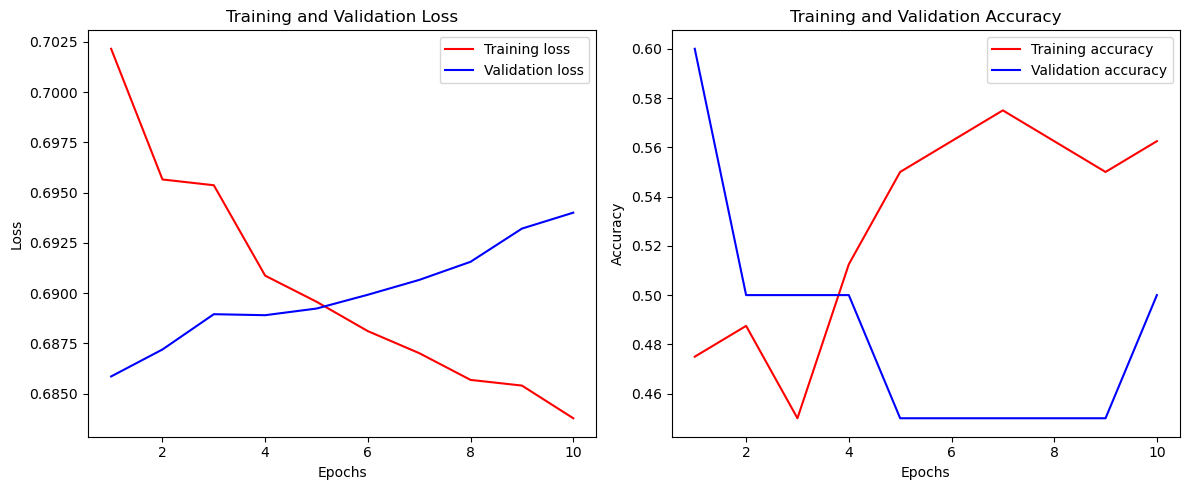

In [6]:
#18. Plot the model's training history.

#Ans

import matplotlib.pyplot as plt

# Extract the data from the DataFrame
epochs = range(1, 11)  # Assuming 10 epochs
loss = history_df['loss']
accuracy = history_df['accuracy']
val_loss = history_df['val_loss']
val_accuracy = history_df['val_accuracy']

# Plotting the training loss and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
4/4 [==============================] - 1s 41ms/step - loss: 0.6875 - accuracy: 0.5781 - val_loss: 0.7158 - val_accuracy: 0.4375
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6764 - accuracy: 0.5781 - val_loss: 0.7142 - val_accuracy: 0.4375
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.5938 - val_loss: 0.7119 - val_accuracy: 0.4375
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6600 - accuracy: 0.6719 - val_loss: 0.7137 - val_accuracy: 0.4375
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.6562 - val_loss: 0.7141 - val_accuracy: 0.4375
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6562 - val_loss: 0.7142 - val_accuracy: 0.4375
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6385 - accuracy: 0.6719 - val_loss: 0.7136 - val_accuracy: 0.4375
Epoch 8/10
4/4 [=============

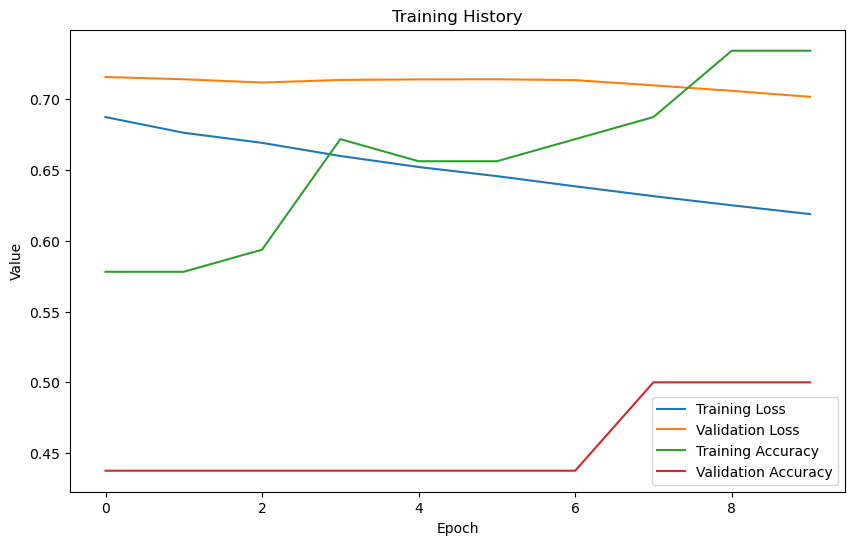

1/1 [==============================] - 0s 81ms/step - loss: 0.6622 - accuracy: 0.6500
Test Loss: 0.6621953845024109
Test Accuracy: 0.6499999761581421


In [8]:
#19. Evaluate the model's performance using the test data.

#Ans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate some example data
data = np.random.random((100, 20))
labels = np.random.randint(2, size=(100, 1))

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Create a sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_split=0.2)

# Store the training history in a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)